# Exploratory Data Analysis
## Task 5- Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
As a sports analyst, we had find out the most successful teams, players and factors contributing win or loss of a team.

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [2]:
#reading the datasets
matc=pd.read_csv('matches.csv')
dele = pd.read_csv('deliveries.csv')

In [3]:
#having a look at the matches.csv dataset
matc.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [4]:
#having a look at the deliveries.csv dataset
dele.head(4)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
#getting the rows and columns in each dataset

print("Shape of matches.csv: ",matc.shape)
print("Shape of deliveris.csv: ",dele.shape)

Shape of matches.csv:  (756, 18)
Shape of deliveris.csv:  (179078, 21)


In [6]:
#getting the information of matches.csv
matc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#getting the information of deliveries.csv

dele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
#checking the number of null values in each column in matches.csv
matc.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
#dropping the third column as it has a lot of null values
matc.drop('umpire3',axis=1,inplace=True)

## Name of Teams

In [10]:
#getting the names of teams
matc['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
#renaming the names of teams with their abbreviated names
x = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

matc.replace(x, y, inplace = True)
dele.replace(x, y, inplace = True)

## Match Analysis
# 1. Number of matches in each season

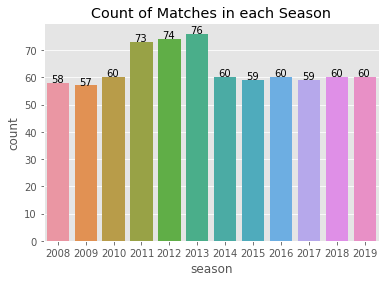

<Figure size 1008x576 with 0 Axes>

In [12]:
#vizualizing the number of matches in each season

ax=sns.countplot(data=matc,x='season')
plt.title('Count of Matches in each Season')
plt.figure(figsize=(14,8))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## 2. Venues with most and least matches

In [13]:
#venues at which most and least matches were played

v=matc['venue'].value_counts()
print(v[[0,-1]])

Eden Gardens       77
OUTsurance Oval     2
Name: venue, dtype: int64


## 3. Vizualising the matches and venues

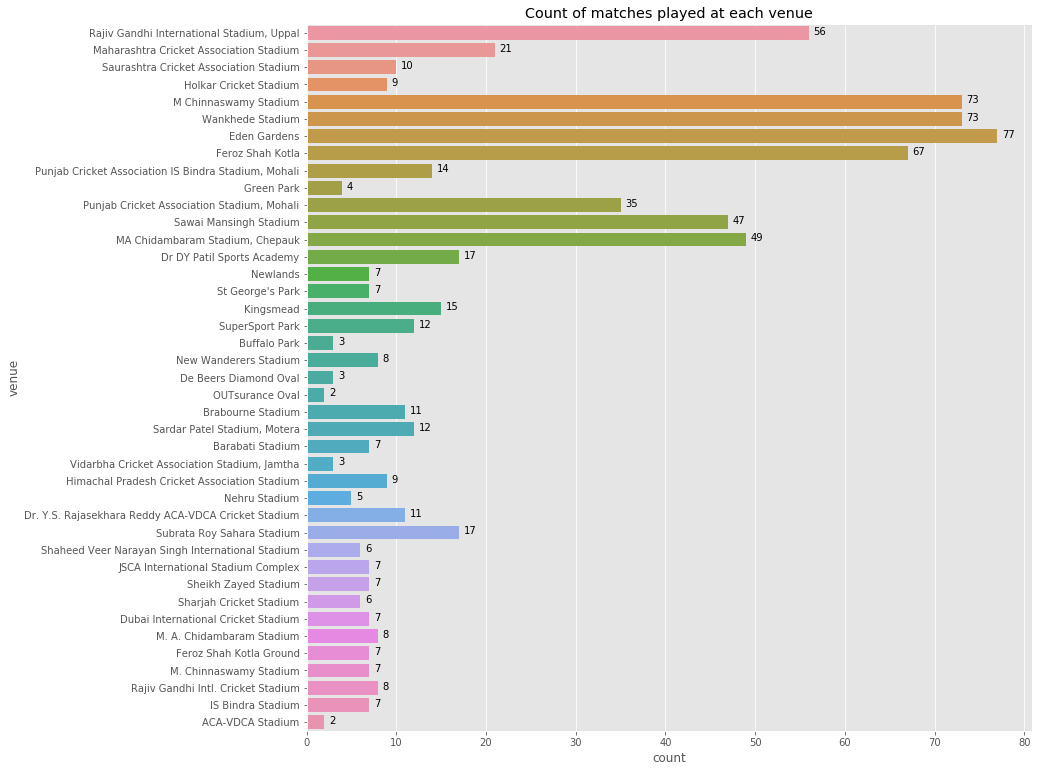

In [14]:
plt.figure(figsize=(13,13))
ax2=sns.countplot(data=matc,y='venue')
for p in ax2.patches:
    ax2.annotate(format(p.get_width()), (p.get_width()+0.5,p.get_y()+0.5, ))
plt.title('Count of matches played at each venue')
plt.show()

## 4. Player of the match Analysis

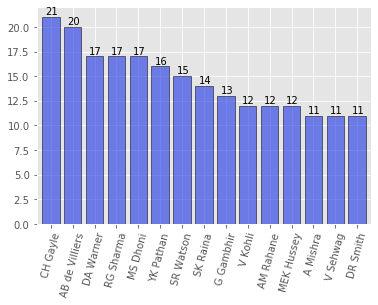

In [15]:
# player awarded as player of the match maximum number of times
ax3=matc['player_of_match'].value_counts().head(15).plot.bar(width=0.8,color=(0.1, 0.2, 0.9, 0.6),edgecolor='black')
plt.xticks(rotation='75')
for p in ax3.patches:
    ax3.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## 5. Toss Win and Match Win

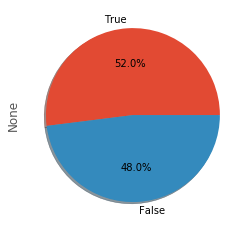

In [16]:
#the % of teams who won the toss and the match as well:
wins = matc['toss_winner'] == matc['winner']
ax4= wins.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)

## 6. Season-wise toss decision

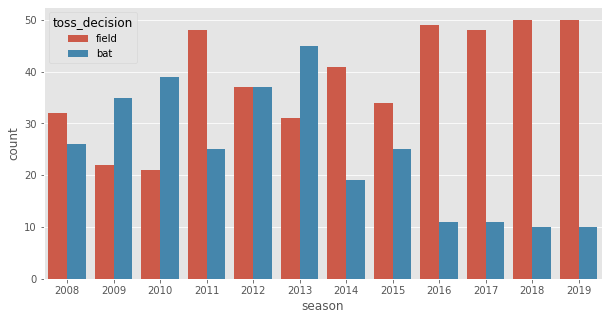

In [17]:
plt.subplots(figsize=(10,5))
sns.countplot(x="season",hue="toss_decision",data=matc)
plt.show()

## 7. Number of seasons played in each city

In [18]:
#finding total seasons in each city
print("Number Of Seasons Played IN Different Cities : \n",matc.groupby('city')['season'].nunique())

Number Of Seasons Played IN Different Cities : 
 city
Abu Dhabi          1
Ahmedabad          3
Bangalore          9
Bengaluru          2
Bloemfontein       1
Cape Town          1
Centurion          1
Chandigarh         9
Chennai            8
Cuttack            3
Delhi             11
Dharamsala         4
Durban             1
East London        1
Hyderabad         10
Indore             3
Jaipur             7
Johannesburg       1
Kanpur             2
Kimberley          1
Kochi              1
Kolkata           11
Mohali             2
Mumbai            11
Nagpur             1
Port Elizabeth     1
Pune               6
Raipur             3
Rajkot             2
Ranchi             3
Sharjah            1
Visakhapatnam      4
Name: season, dtype: int64


# Plotting the number of seasons played in different cities

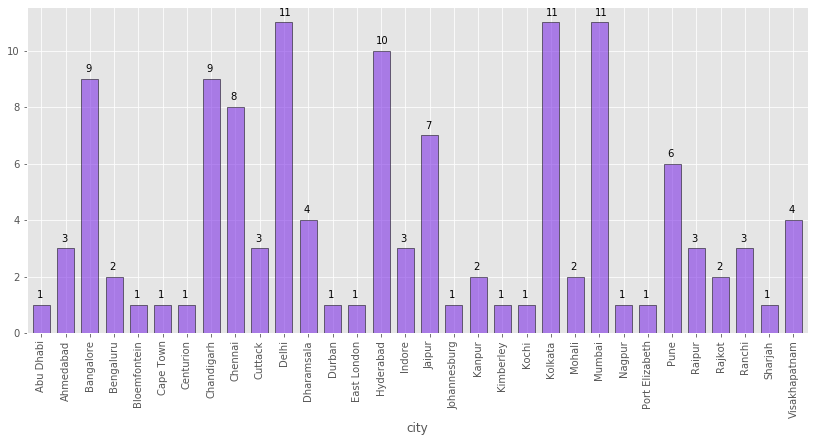

In [19]:
#plotting it
plt.figure(figsize=(14,6))
ax5=matc.groupby('city')['season'].nunique().plot.bar(width=0.7,color=(0.5, 0.2, 0.9, 0.6),edgecolor='black')
for p in ax5.patches:
    ax5.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## 8. No. of winners in different cities

In [20]:
#finding total winners in each city
print("Number Of Winners In Different Cities \n",matc.groupby('city')['winner'].nunique())

Number Of Winners In Different Cities 
 city
Abu Dhabi          4
Ahmedabad          6
Bangalore         10
Bengaluru          6
Bloemfontein       2
Cape Town          6
Centurion          7
Chandigarh        10
Chennai            9
Cuttack            3
Delhi             12
Dharamsala         4
Durban             7
East London        3
Hyderabad         10
Indore             5
Jaipur             8
Johannesburg       5
Kanpur             3
Kimberley          3
Kochi              4
Kolkata           11
Mohali             3
Mumbai            12
Nagpur             2
Port Elizabeth     5
Pune              11
Raipur             3
Rajkot             7
Ranchi             5
Sharjah            5
Visakhapatnam      7
Name: winner, dtype: int64


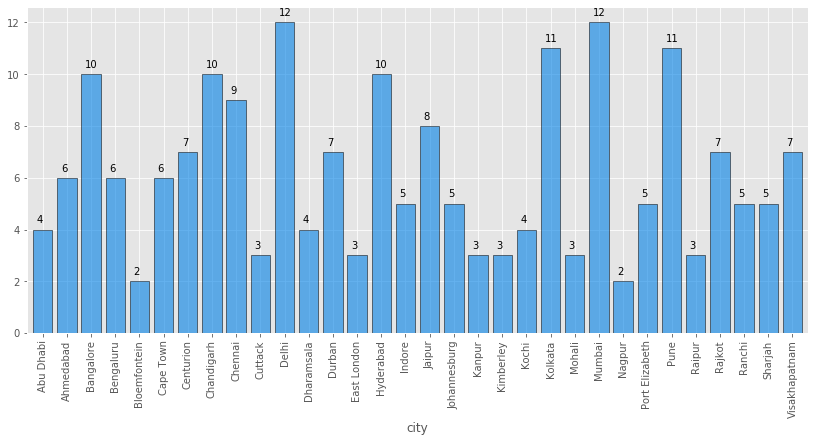

In [21]:
#plotting it
plt.figure(figsize=(14,6))
ax6=matc.groupby('city')['winner'].nunique().plot.bar(width=0.8,color=(0, 0.5, 0.9, 0.6),edgecolor='black')
for p in ax6.patches:
    ax6.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## 9. Winners in Mumbai

city    winner
Mumbai  MI        53
        CSK       11
        RR         7
        KXIP       5
        RCB        5
        SRH        5
        DC         4
        KKR        3
        PW         3
        RPS        3
        GL         1
        KTK        1
Name: winner, dtype: int64


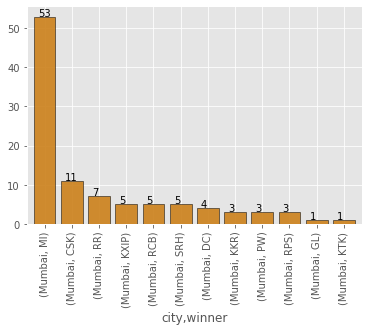

In [22]:
x=matc[matc["city"]=="Mumbai"].groupby('city')['winner'].value_counts()
print(x)
ax7=x.plot.bar(width=0.8,color=(0.8, 0.5, 0.1, 0.9),edgecolor='black')
for p in ax7.patches:
    ax7.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## 10. Winners in Delhi

city   winner
Delhi  DC        31
       SRH        8
       CSK        6
       RCB        6
       KKR        5
       KXIP       5
       MI         4
       RR         4
       GL         1
       KTK        1
       PW         1
       RPS        1
Name: winner, dtype: int64


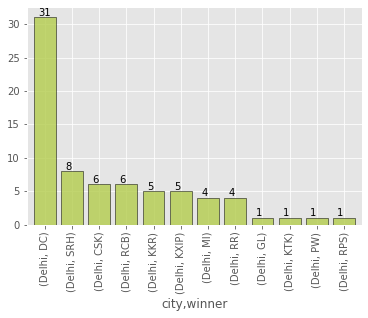

In [23]:
x=matc[matc["city"]=="Delhi"].groupby('city')['winner'].value_counts()
print(x)
ax8=x.plot.bar(width=0.8,color=(0.7, 0.8, 0.3, 0.8),edgecolor='black')
for p in ax8.patches:
    ax8.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## 11. Match Winning statistics- Match where team won by highest runs

In [24]:
print("Match where team won by highest runs:\n",matc.iloc[matc['win_by_runs'].idxmax()])

Match where team won by highest runs:
 id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                            MI
team2                            DC
toss_winner                      DC
toss_decision                 field
result                       normal
dl_applied                        0
winner                           MI
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object


## 12. Match Winning statistics- Match where team won by highest wickets

In [25]:
print("Match where team won by highest wickets:\n",matc.iloc[matc['win_by_wickets'].idxmax()])

Match where team won by highest wickets:
 id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                                  GL
team2                                                 KKR
toss_winner                                           KKR
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                                                KKR
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                       

## 13. Statistics of teams

In [26]:
#Details on Toss won by each team, Total Matches played so far, total matches being won list.
team_stats = pd.DataFrame({'Total Matches played': matc.team1.value_counts() + matc.team2.value_counts(), 'Total won': matc.winner.value_counts(), 'Toss won': matc.toss_winner.value_counts(), 
                          'Total lost': ((matc.team1.value_counts() + matc.team2.value_counts()) - matc.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
team_stats

,Teams,Total Matches played,Total won,Toss won,Total lost
0,CSK,164,100,89,64
1,DC,177,77,90,100
2,GL,30,13,15,17
3,KKR,178,92,92,86
4,KTK,14,6,8,8
5,KXIP,176,82,81,94
6,MI,187,109,98,78
7,PW,46,12,20,34
8,RCB,180,84,81,96
9,RPS,30,15,13,15


## 14. Matches won by each team

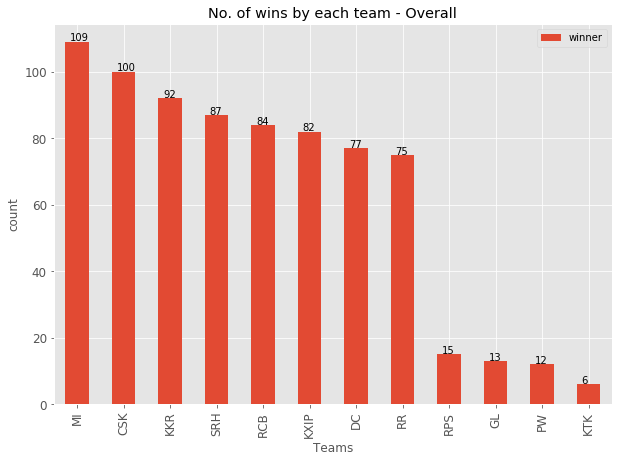

In [27]:
#Plotting the above data Analysis - Total Won
Total_won = matc.winner.value_counts()
ax9 = Total_won.plot(kind='bar', title ="No. of wins by each team - Overall",figsize=(10,7),legend=True, fontsize=12)
ax9.set_xlabel("Teams",fontsize=12)
ax9.set_ylabel("count",fontsize=12)
for p in ax9.patches:
    ax9.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.25))
plt.show()

## 15. Toss won count for each team

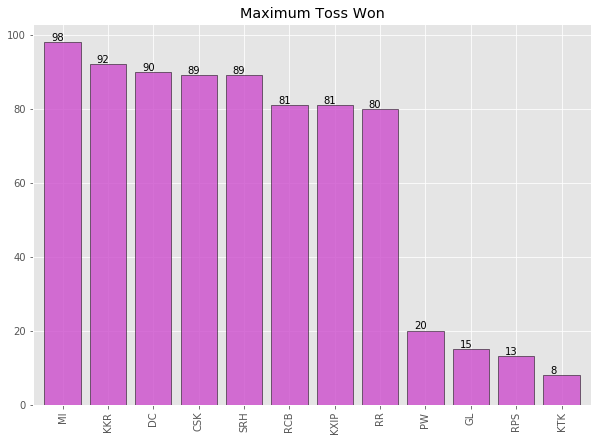

In [28]:
#Maximum Toss Won:
plt.subplots(figsize=(10,7))
ax10=matc['toss_winner'].value_counts().plot.bar(width=0.8,color=(0.8, 0.3, 0.8, 0.8),edgecolor='black')
plt.title("Maximum Toss Won")
for p in ax10.patches:
    ax10.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.35))
plt.show()


## 16. Matches won by MI per season

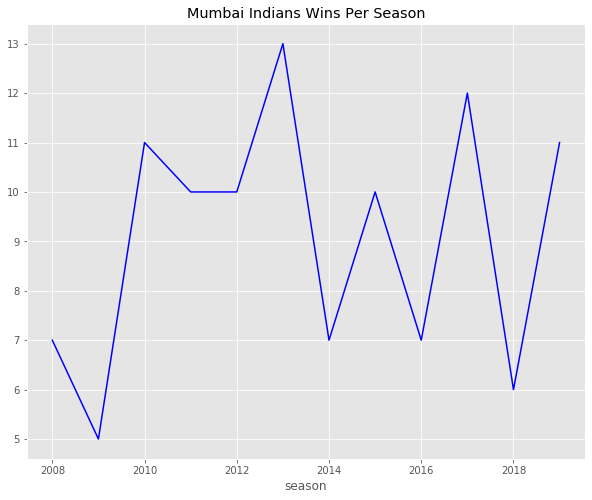

In [29]:
#The number of matches won by Mumbai Indians per season
no_of_wins = matc[matc['winner'] == 'MI'].groupby(['season']).count()
no_of_wins['winner'].plot(kind='line', figsize=(10, 8), title='Mumbai Indians Wins Per Season',c="b")

## 17. Matches won by CSK per season

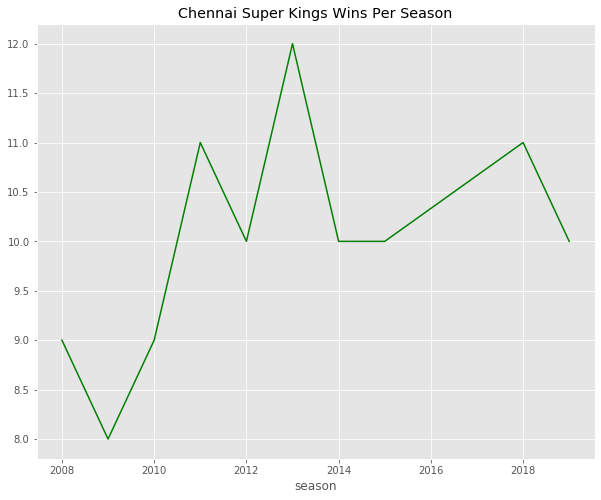

In [30]:
#The number of matches won by CSK per season

no_of_wins = matc[matc['winner'] == 'CSK'].groupby(['season']).count()
no_of_wins['winner'].plot(kind='line', figsize=(10, 8), title='Chennai Super Kings Wins Per Season',c="g")

## 18. Winners of each season

In [31]:
#Season's Winner
season_winner = matc.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
season_winner

,season,winner
0,2017,MI
1,2008,RR
2,2009,SRH
3,2010,CSK
4,2011,CSK
5,2012,KKR
6,2013,MI
7,2014,KKR
8,2015,MI
9,2016,SRH


## Runs Analysis
# 19. Total Runs per Season

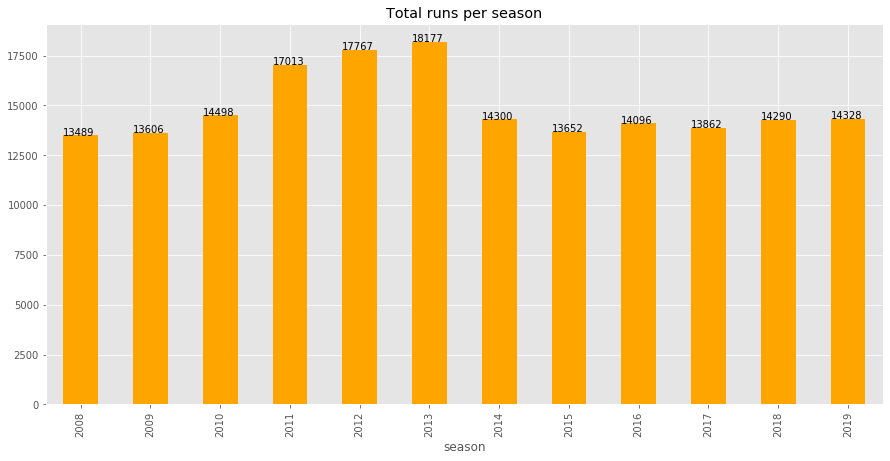

In [32]:
matc.rename(columns = {'id':'match_id'}, inplace = True)
df3=pd.merge(matc, dele, on="match_id")
ax11=df3[["season","total_runs"]].groupby("season")['total_runs'].count().plot(kind="bar", title="Total runs per season", figsize=(15,7), color="orange")
for p in ax11.patches:
    ax11.annotate(format(p.get_height()), (p.get_x(), p.get_height()+3))
plt.show()

## 20. Players with the Most Fours

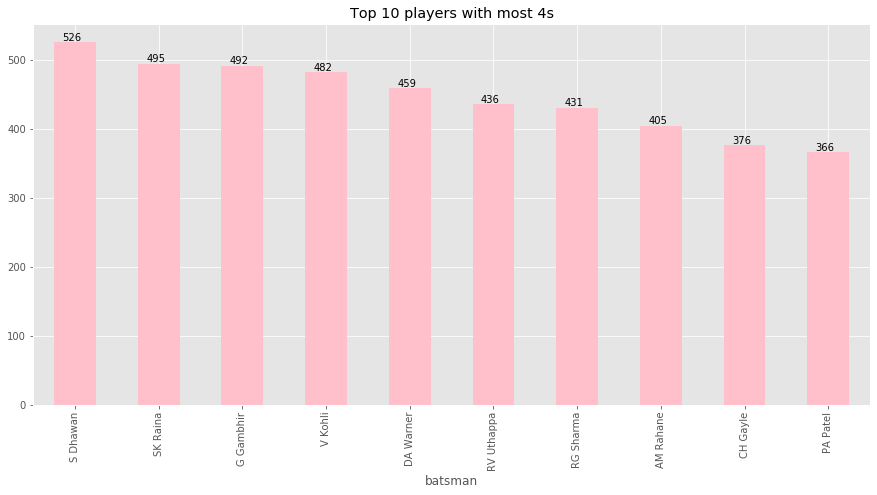

In [33]:
ax12=dele[dele["batsman_runs"] == 4].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", title="Top 10 players with most 4s", figsize=(15,7), color="pink")
for p in ax12.patches:
    ax12.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.show()

## 21. Players with the most sixes

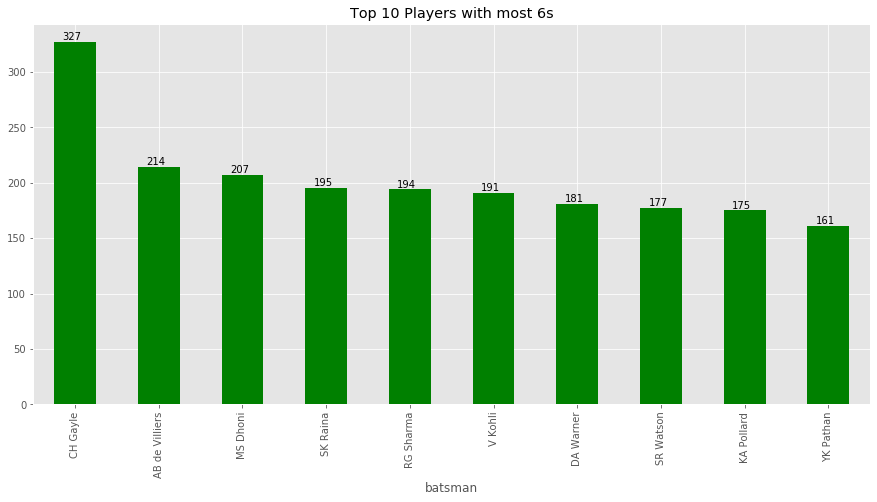

In [34]:
ax13=dele[dele["batsman_runs"] == 6].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", title="Top 10 Players with most 6s", figsize=(15,7), color="green")
for p in ax13.patches:
    ax13.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.show()

## 22. Umpire Analysis

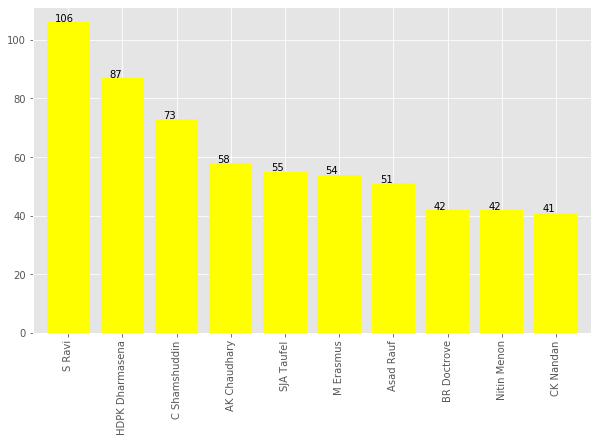

In [35]:
#Favourite Umpires
plt.subplots(figsize=(10,6))
ump=pd.concat([matc['umpire1'],matc['umpire2']]) 
ax14=ump.value_counts().head(10).plot.bar(width=0.8,color='yellow')
for p in ax14.patches:
    ax14.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## 23. Number of inings, batting teams, super over matches (overall)

In [36]:
print("Number Of Innings And Their Counts :\n",dele['inning'].value_counts())
print("\nBatting Team 's Max Counts : \n",dele['batting_team'].value_counts())
print("\nNumber Of Super Over Matches  : \n",dele['is_super_over'].value_counts()[1])

Number Of Innings And Their Counts :
 1    92742
2    86240
3       50
4       38
5        8
Name: inning, dtype: int64

Batting Team 's Max Counts : 
 MI      22619
SRH     21942
KXIP    20931
RCB     20908
KKR     20858
DC      20695
CSK     19762
RR      17292
PW       5443
GL       3566
RPS      3480
KTK      1582
Name: batting_team, dtype: int64

Number Of Super Over Matches  : 
 81


## 24. 3000 runs club

In [37]:
batsman_runs=dele.groupby("batsman")["batsman_runs"].count().sort_values(ascending = False)
club3000=batsman_runs.where(batsman_runs >= 3000).dropna()
club3000

batsman
V Kohli       4211.0
SK Raina      4044.0
RG Sharma     3816.0
S Dhawan      3776.0
G Gambhir     3524.0
RV Uthappa    3492.0
DA Warner     3398.0
MS Dhoni      3318.0
AM Rahane     3215.0
CH Gayle      3131.0
Name: batsman_runs, dtype: float64

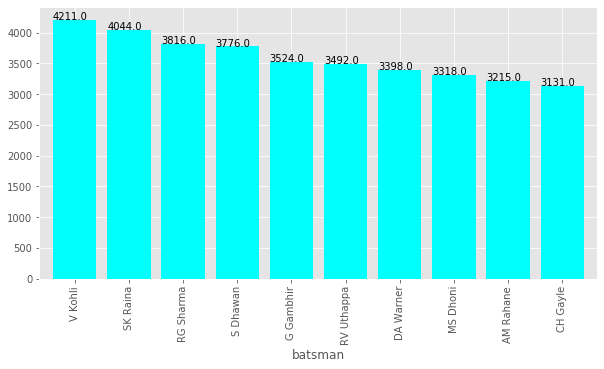

In [38]:
plt.subplots(figsize=(10,5))
ax=club3000.plot.bar(width=0.8,color='cyan')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+5))
plt.show()

## 25. Batsmen Summary: runs taken and balls faced

In [39]:
batsmen_summary = dele.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen_summary.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen_summary = batsmen_summary.sort_values(['balls','runs'], ascending=False)
batsmen_summary.head(10)

,balls,runs
batsman,,
V Kohli,4211,5434
SK Raina,4044,5415
RG Sharma,3816,4914
S Dhawan,3776,4632
G Gambhir,3524,4223
RV Uthappa,3492,4446
DA Warner,3398,4741
MS Dhoni,3318,4477
AM Rahane,3215,3850


## 26. Strike rate of batsmen

In [40]:
batsmen_summary['batting_strike_rate'] = batsmen_summary['runs']/batsmen_summary['balls'] * 100
batsmen_summary['batting_strike_rate'] = batsmen_summary['batting_strike_rate'].round(2)
batsmen_summary.head(10)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


## 27. Top 20 Wicket takers

In [41]:

dele['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [42]:
#wickets taken by bowlers => caught,bowled,run out,lbw,stumped,caught and bowled,hit wicket
wk_taken=dele[(dele["dismissal_kind"] == 'caught') | (dele["dismissal_kind"] == 'bowled') | (dele["dismissal_kind"] == 'run out') | (dele["dismissal_kind"] == 'lbw') | (dele["dismissal_kind"] == 'stumped') | (dele["dismissal_kind"] == 'caught and bowled') | (dele["dismissal_kind"] == 'hit wicket')].groupby("bowler")['bowler'].count().sort_values(ascending = False)

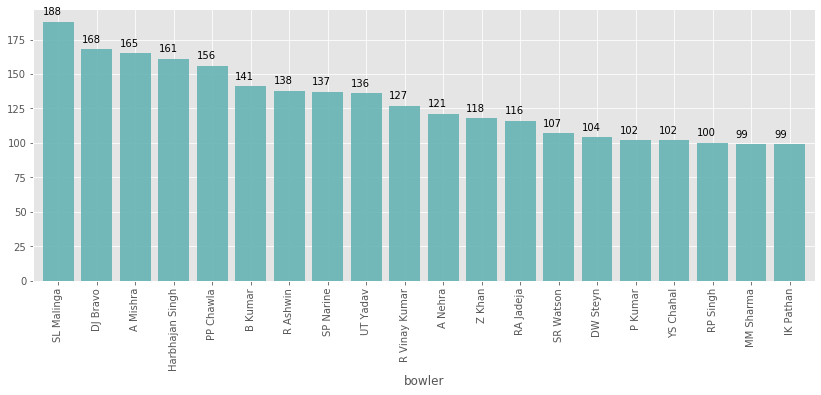

In [43]:
#top 20 wicket takers
plt.figure(figsize=(14,5))
ax = wk_taken.head(20).plot.bar(width=0.8,color=(0.4,0.7,0.7,0.9))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+5))
plt.show()